Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not


# FRAUD CHECK DATASET

In [2]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [5]:
df = pd.read_csv("Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
df.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [7]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban'] dropping first dummy variable
df=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [8]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
df["TaxInc"] = pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [9]:
print(df)

     Taxable.Income  City.Population  Work.Experience  Undergrad_YES  \
0             68833            50047               10              0   
1             33700           134075               18              1   
2             36925           160205               30              0   
3             50190           193264               15              1   
4             81002            27533               28              0   
..              ...              ...              ...            ...   
595           76340            39492                7              1   
596           69967            55369                2              1   
597           47334           154058                0              0   
598           98592           180083               17              1   
599           96519           158137               16              0   

     Marital.Status_Married  Marital.Status_Single  Urban_YES TaxInc  
0                         0                      1          1   

Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [10]:
#After creation of new col. TaxInc also made its dummies var concating right side of df
df = pd.get_dummies(df,columns = ["TaxInc"],drop_first=True)

In [11]:
#Viewing buttom 10 observations
df.tail(10)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,43018,85195,14,0,1,0,1,1
591,27394,132859,18,1,0,1,1,0
592,68152,75143,16,1,0,1,0,1
593,84775,131963,10,0,0,0,1,1
594,47364,97526,9,0,1,0,1,1
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1
599,96519,158137,16,0,0,0,0,1


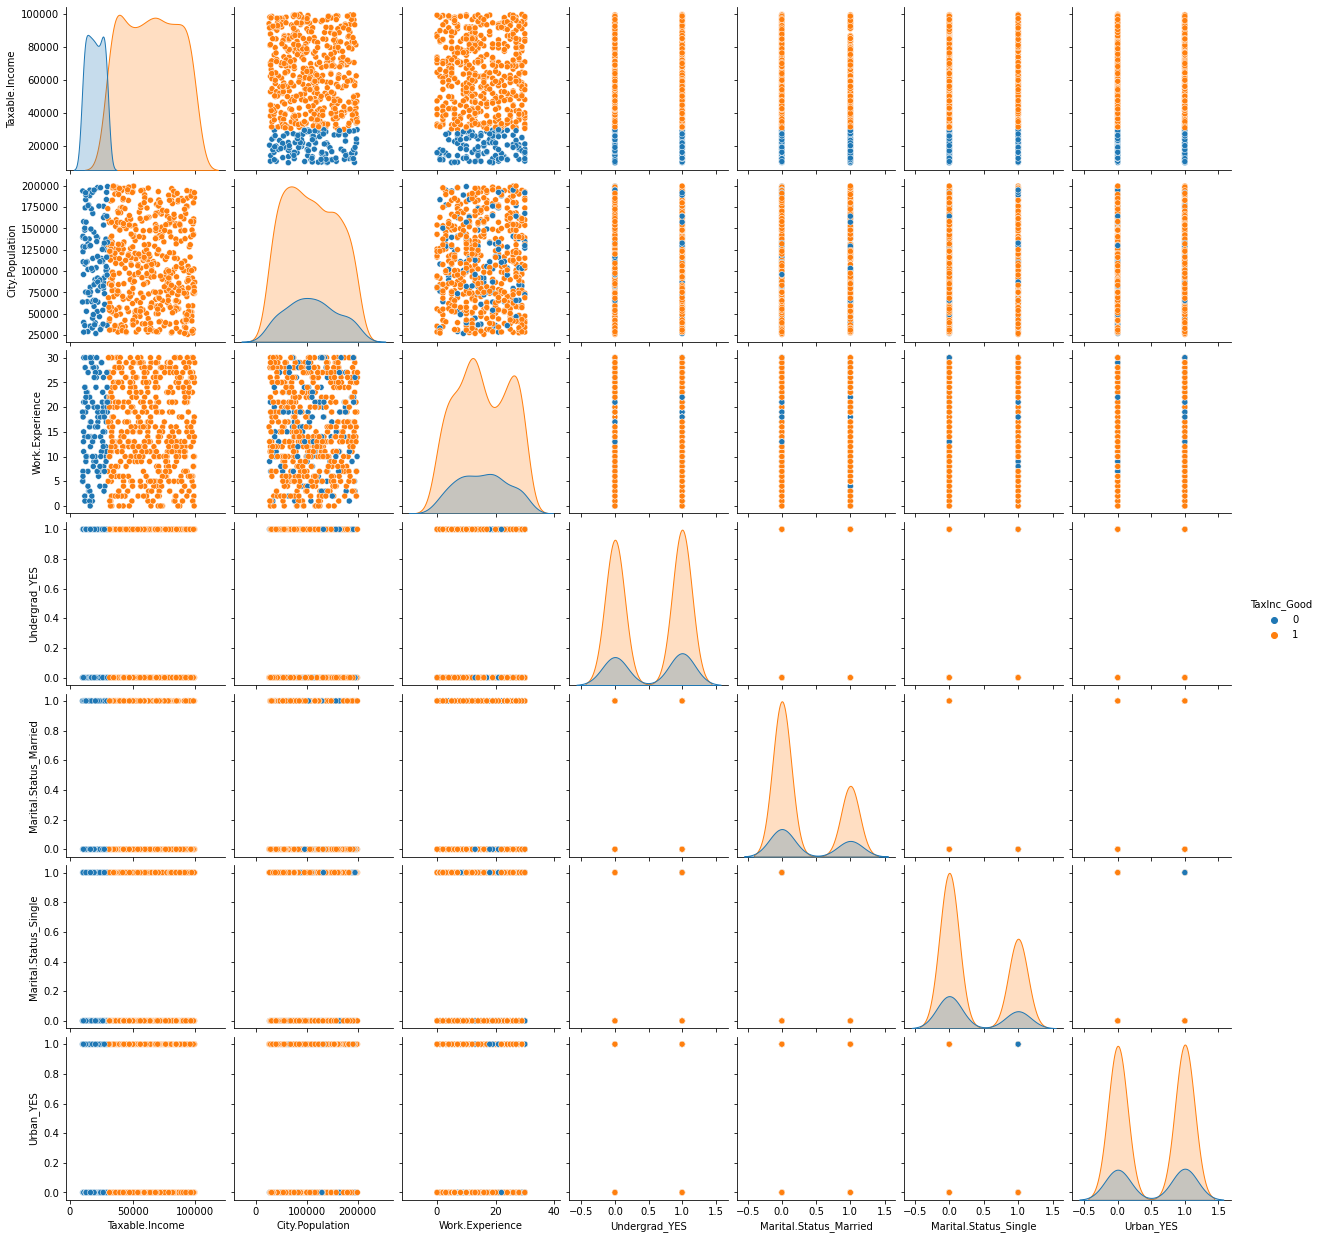

In [12]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=df, hue = 'TaxInc_Good')

In [13]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [14]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:,1:])
df_norm.tail(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,1.0
591,0.615406,0.600000,1.0,0.0,1.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,1.0,0.0,1.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,1.0
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


In [15]:
# Declaring features & target
X = df_norm.drop(['TaxInc_Good'], axis=1)
y = df_norm['TaxInc_Good']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# Splitting data into train & test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
##Converting the Taxable income variable to bucketing. 
df_norm["income"]="<=30000"
df_norm.loc[df["Taxable.Income"]>=30000,"income"]="Good"
df_norm.loc[df["Taxable.Income"]<=30000,"income"]="Risky"

In [19]:
##Droping the Taxable income variable
df.drop(["Taxable.Income"],axis=1,inplace=True)

In [20]:
df.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)
## As we are getting error as "ValueError: could not convert string to float: 'YES'".
## Model.fit doesnt not consider String. So, we encode

In [21]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = le.fit_transform(df[column_name])
    else:
        pass

In [22]:
##Splitting the data into featuers and labels
features = df.iloc[:,0:5]
labels = df.iloc[:,5]


In [23]:
## Collecting the column names
colnames = list(df.columns)
predictors = colnames[0:5]
target = colnames[5]
##Splitting the data into train and test

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)

In [25]:
##Model building
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
model.estimators_
model.classes_
model.n_features_
model.n_classes_

2

In [29]:
model.n_outputs_

1

In [30]:
model.oob_score_
###74.7833%

0.48541666666666666

In [31]:
##Predictions on train data
prediction = model.predict(x_train)

In [32]:
##Accuracy
# For accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)
##98.33%

In [33]:
np.mean(prediction == y_train)
##98.33%

0.9791666666666666

In [34]:
##Confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)

In [35]:
##Prediction on test data
pred_test = model.predict(x_test)

In [36]:
##Accuracy
acc_test =accuracy_score(y_test,pred_test)
##78.333%

In [45]:
## In random forest we can plot a Decision tree present in Random forest
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt

from six import StringIO

In [46]:
tree = model.estimators_[5]

In [49]:
dot_data = StringIO()
export_graphviz(tree,out_file = dot_data, filled = True,rounded = True, feature_names = predictors ,class_names = target,)

Building Decision Tree Classifier using Entropy Criteria

In [50]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [51]:
from sklearn import tree

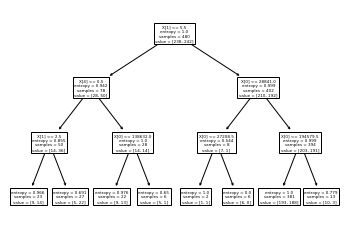

In [52]:
#PLot the decision tree
tree.plot_tree(model);

In [53]:
colnames = list(df.columns)
colnames

['population',
 'experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']

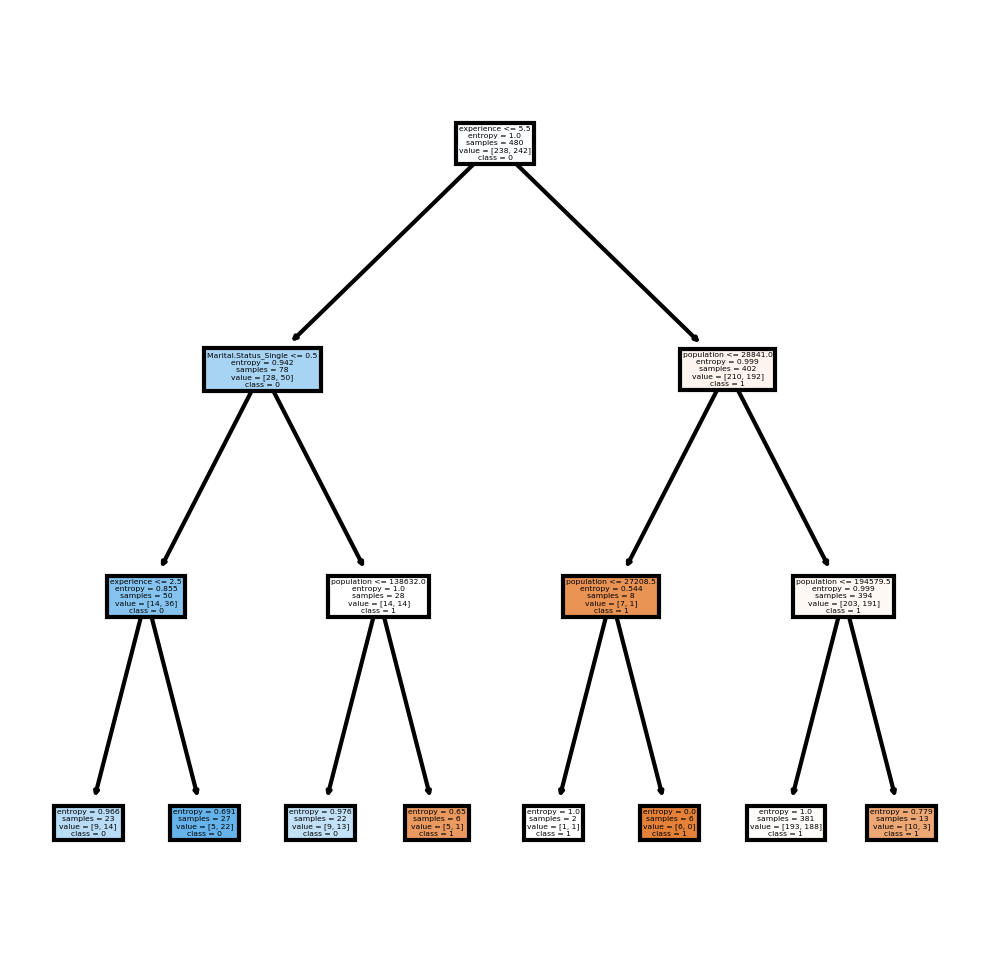

In [54]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [55]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    104
1     16
dtype: int64

In [56]:
preds

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

In [57]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Urban_YES,,
0,53,7
1,51,9


In [58]:
# Accuracy 
np.mean(preds==y_test)

0.5166666666666667

Building Decision Tree Classifier (CART) using Gini Criteria

In [59]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [60]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [61]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.5166666666666667

Decision Tree Regression Example

In [62]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [63]:
array = df.values
X = array[:,0:3]
y = array[:,3]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [65]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [66]:
#Find the accuracy
model.score(X_test,y_test)

-0.8931902985074629

# COMPANY DATASET

Decision Tree
 
Assignment

About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics

In [3]:
df = pd.read_csv("Company_Data.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [5]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban'] dropping first dummy variable
df=pd.get_dummies(df,columns=['ShelveLoc','US','Urban'], drop_first=True)

In [11]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
df["Sl"] = pd.cut(df["Sales"], bins = [10002,30000,99620], labels = ["Risky", "high"])

In [12]:
print(df)

     Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
0     9.50        138      73           11         276    120   42         17   
1    11.22        111      48           16         260     83   65         10   
2    10.06        113      35           10         269     80   59         12   
3     7.40        117     100            4         466     97   55         14   
4     4.15        141      64            3         340    128   38         13   
..     ...        ...     ...          ...         ...    ...  ...        ...   
395  12.57        138     108           17         203    128   33         14   
396   6.14        139      23            3          37    120   55         11   
397   7.41        162      26           12         368    159   40         18   
398   5.94        100      79            7         284     95   50         12   
399   9.71        134      37            0          27    120   49         16   

     ShelveLoc_Good  Shelve

In [13]:
#After creation of new col. TaxInc also made its dummies var concating right side of df
df = pd.get_dummies(df,columns = ["Sl"],drop_first=True)

In [14]:
#Viewing buttom 10 observations
df.tail(10)

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes,Sl_Good,Sl_high
390,5.47,108,75,9,61,111,67,12,0,1,1,1,0,0
391,6.10,153,63,0,49,124,56,16,0,0,0,1,0,0
392,4.53,129,42,13,315,130,34,13,0,0,1,1,0,0
393,5.57,109,51,10,26,120,30,17,0,1,1,0,0,0
394,5.35,130,58,19,366,139,33,16,0,0,1,1,0,0
395,12.57,138,108,17,203,128,33,14,1,0,1,1,0,0
396,6.14,139,23,3,37,120,55,11,0,1,1,0,0,0
397,7.41,162,26,12,368,159,40,18,0,1,1,1,0,0
398,5.94,100,79,7,284,95,50,12,0,0,1,1,0,0
399,9.71,134,37,0,27,120,49,16,1,0,1,1,0,0


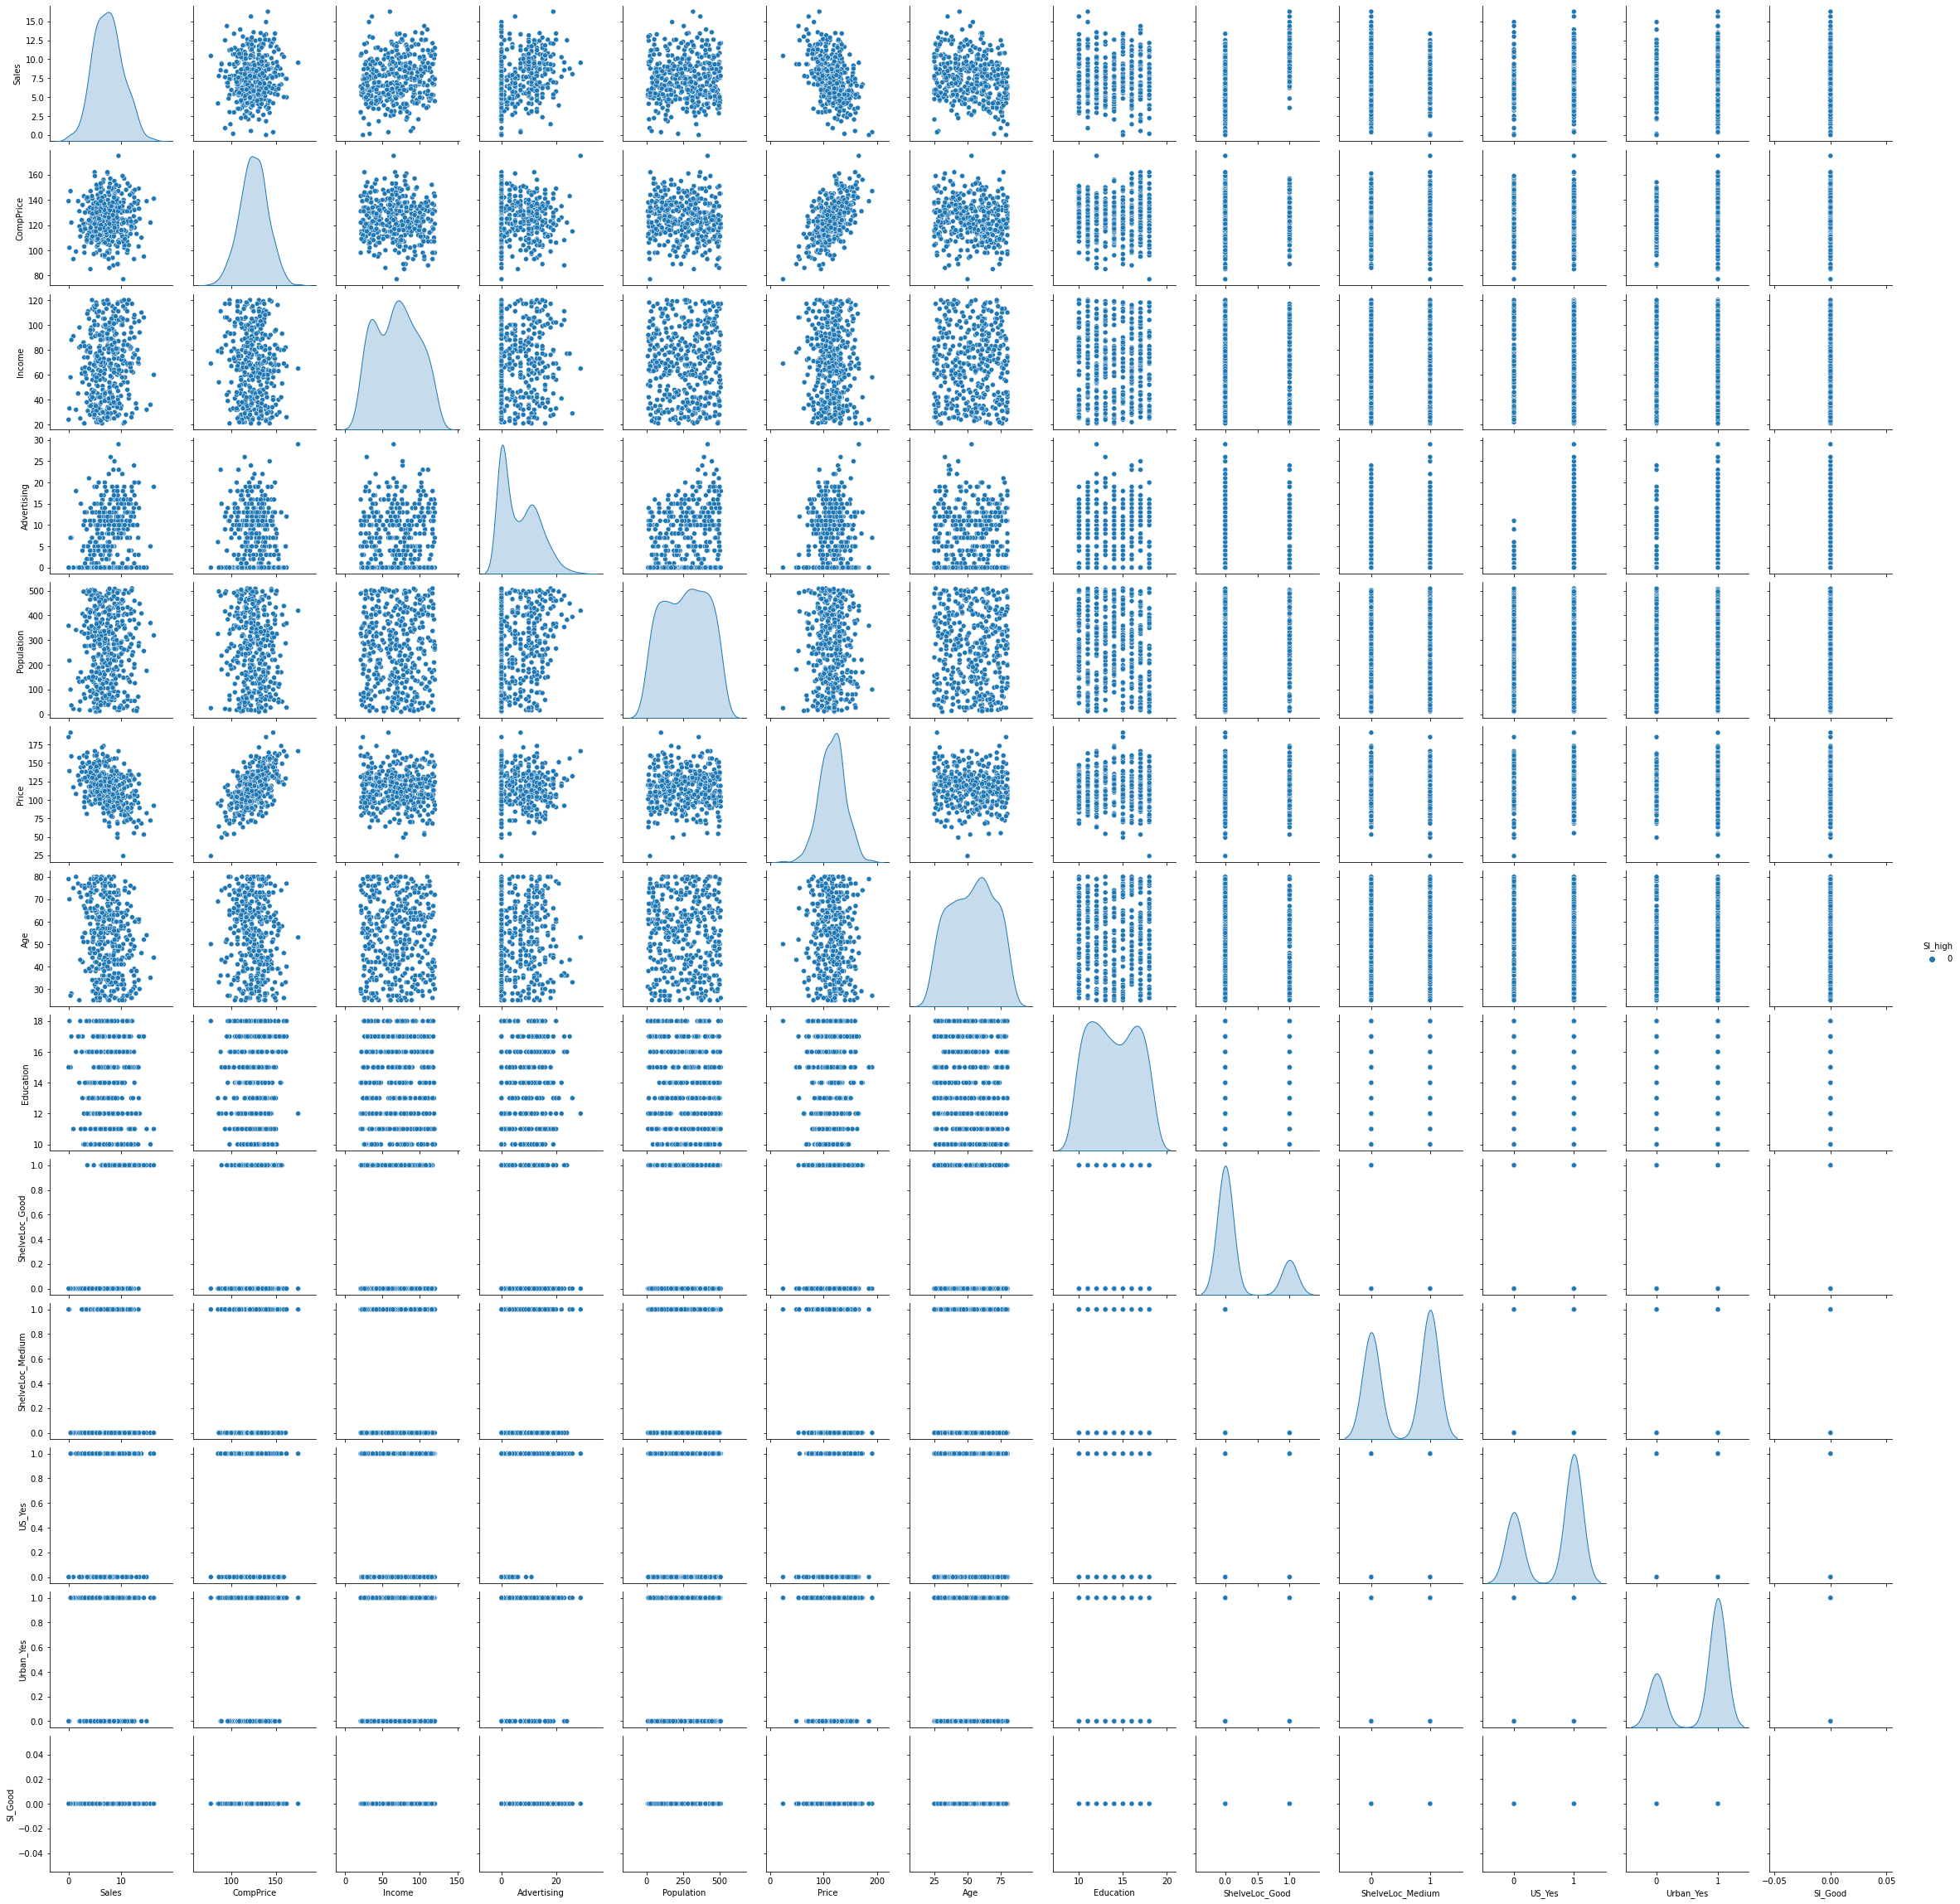

In [15]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=df, hue = 'Sl_high')

In [16]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [17]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:,1:])
df_norm.tail(10)

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes,Sl_Good,Sl_high
390,0.316327,0.545455,0.310345,0.102204,0.520958,0.763636,0.250,0.0,1.0,1.0,1.0,NaN,NaN
391,0.775510,0.424242,0.000000,0.078156,0.598802,0.563636,0.750,0.0,0.0,0.0,1.0,NaN,NaN
392,0.530612,0.212121,0.448276,0.611222,0.634731,0.163636,0.375,0.0,0.0,1.0,1.0,NaN,NaN
393,0.326531,0.303030,0.344828,0.032064,0.574850,0.090909,0.875,0.0,1.0,1.0,0.0,NaN,NaN
394,0.540816,0.373737,0.655172,0.713427,0.688623,0.145455,0.750,0.0,0.0,1.0,1.0,NaN,NaN
395,0.622449,0.878788,0.586207,0.386774,0.622754,0.145455,0.500,1.0,0.0,1.0,1.0,NaN,NaN
396,0.632653,0.020202,0.103448,0.054108,0.574850,0.545455,0.125,0.0,1.0,1.0,0.0,NaN,NaN
397,0.867347,0.050505,0.413793,0.717435,0.808383,0.272727,1.000,0.0,1.0,1.0,1.0,NaN,NaN
398,0.234694,0.585859,0.241379,0.549098,0.425150,0.454545,0.250,0.0,0.0,1.0,1.0,NaN,NaN
399,0.581633,0.161616,0.000000,0.034068,0.574850,0.436364,0.750,1.0,0.0,1.0,1.0,NaN,NaN


In [18]:
# Declaring features & target
X = df_norm.drop(['Sl_high'], axis=1)
y = df_norm['Sl_high']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# Splitting data into train & test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
##Droping the Sales variable
df.drop(["Sales"],axis=1,inplace=True)

In [22]:
##Splitting the data into featuers and labels
features = df.iloc[:,0:5]
labels = df.iloc[:,5]

In [23]:
## Collecting the column names
colnames = list(df.columns)
predictors = colnames[0:5]
target = colnames[5]
##Splitting the data into train and test

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)

In [25]:
##Model building
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
model.estimators_
model.classes_
model.n_features_
model.n_classes_

56

In [29]:
model.n_outputs_

1

In [30]:
model.oob_score_
###74.7833%

0.021875

In [31]:
##Predictions on train data
prediction = model.predict(x_train)

In [32]:
##Accuracy
# For accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)
##98.33%

In [33]:
np.mean(prediction == y_train)
##98.33%

1.0

In [34]:
##Confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)

In [35]:
##Prediction on test data
pred_test = model.predict(x_test)

In [36]:
##Accuracy
acc_test =accuracy_score(y_test,pred_test)
##78.333%

In [51]:
## In random forest we can plot a Decision tree present in Random forest
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt

from six import StringIO

Building Decision Tree Classifier using Entropy Criteria

In [53]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [54]:
from sklearn import tree

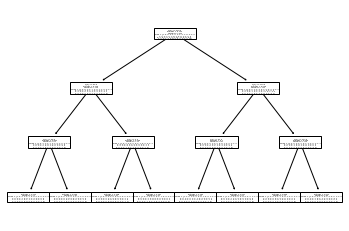

In [55]:
#PLot the decision tree
tree.plot_tree(model);

In [56]:
colnames = list(df.columns)
colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'ShelveLoc_Good',
 'ShelveLoc_Medium',
 'US_Yes',
 'Urban_Yes',
 'Sl_Good',
 'Sl_high']

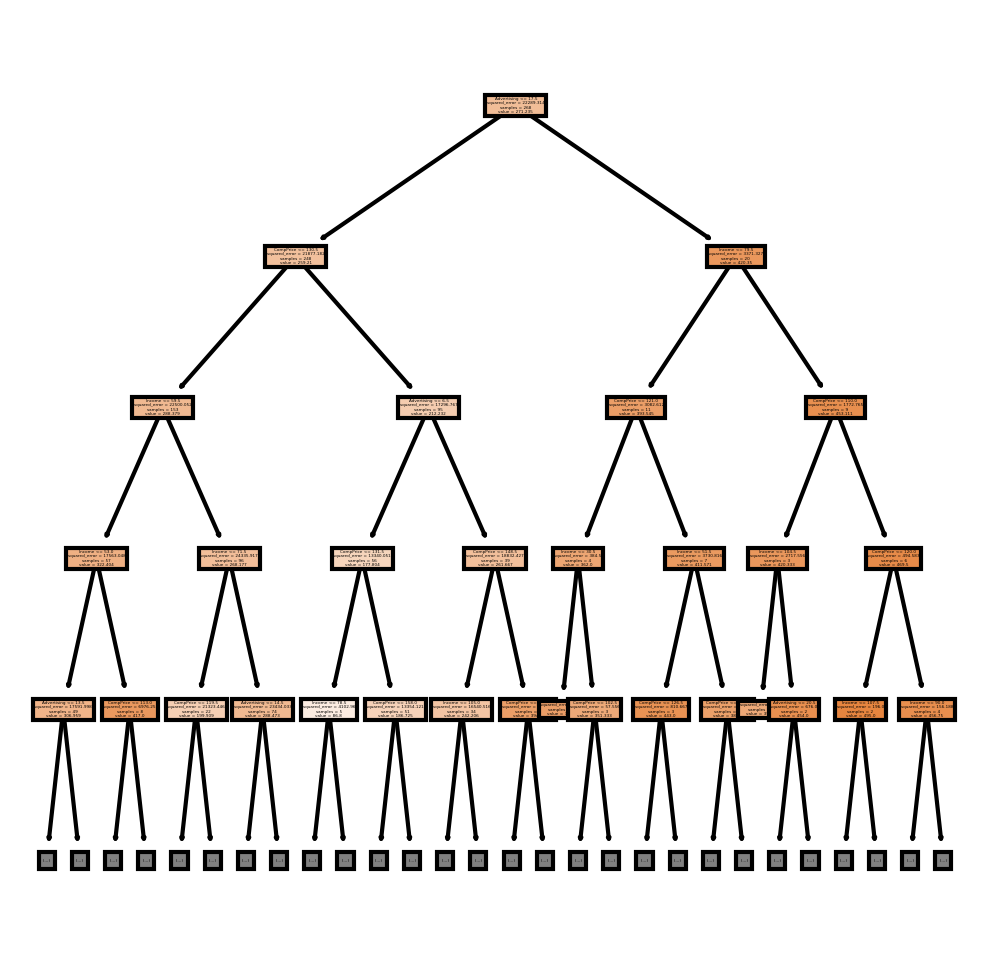

In [124]:
fn=['CompPrice','Income','Advertising','Population','Price','Age','Education','ShelveLoc_Good','ShelveLoc_Medium','US_Yes','Urban_Yes','Sl_Good']
cn=['1','0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(model,max_depth=4,feature_names=fn,class_names=cn,label='all',filled=True,impurity=True,node_ids=False,rounded=False,precision=3,ax=None,fontsize=None);



In [97]:
len(fn)

12

In [79]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

62    18
56    11
39    11
29    10
80     9
55     8
44     7
61     6
dtype: int64

In [80]:
preds

array([80, 29, 29, 80, 56, 80, 61, 39, 39, 29, 55, 62, 56, 29, 55, 80, 61,
       80, 62, 56, 61, 56, 29, 62, 39, 62, 39, 56, 80, 56, 62, 39, 29, 62,
       39, 39, 56, 44, 61, 44, 39, 61, 62, 62, 61, 39, 55, 44, 44, 55, 29,
       55, 62, 80, 62, 29, 80, 62, 44, 39, 80, 44, 29, 56, 55, 55, 62, 44,
       62, 29, 56, 62, 39, 62, 62, 56, 56, 55, 62, 62], dtype=int64)

In [81]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,29,39,44,55,56,61,62,80
Age,,,,,,,,
25,1,0,1,0,0,0,0,0
26,0,0,1,0,0,0,1,0
27,0,0,0,0,1,0,0,0
28,0,0,0,0,0,0,1,0
29,0,0,1,0,0,0,0,0
30,0,0,0,0,1,0,0,0
31,0,0,0,0,0,0,1,0
32,0,0,0,0,0,1,0,0
33,0,1,0,0,0,0,1,0


In [82]:
# Accuracy 
np.mean(preds==y_test)

0.0125

Building Decision Tree Classifier (CART) using Gini Criteria

In [83]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [84]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [85]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.0125

Decision Tree Regression Example

In [86]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [87]:
array = df.values
X = array[:,0:3]
y = array[:,3]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [89]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [90]:
#Find the accuracy
model.score(X_test,y_test)

-0.8704270738276649